<https://www.nejm.org/doi/full/10.1056/NEJMoa2034577>

In [78]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

size_control = 21728 
size_treatment = 21720
size_control = 18198 
size_treatment = 18325
size_control = 17411
size_treatment = 17511

#size_control = 2214 
#size_treatment = 2222

cases_treatment = 8
cases_control = 162
successes_control = size_control - cases_control
successes_treatment = size_treatment - cases_treatment

alpha_A = successes_control
beta_A = size_control - successes_control
alpha_B = successes_treatment
beta_B = size_treatment - successes_treatment
successes_treatment / size_treatment

0.9963996399639964

In [66]:
1-(cases_treatment/size_control)/(cases_control/size_treatment)

0.9504388459522455

## Method 1

In [52]:
cases_treatment/size_control

0.00045947963930848316

In [43]:
a = 0.700102 + cases_control - cases_treatment
b = 1 + cases_treatment
a/(a+b)

0.9450214148308839

In [55]:
from hpd import hpd_grid
samples = stats.beta.rvs(a, b, size=100000)
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

[(0.6746, 1.0)]

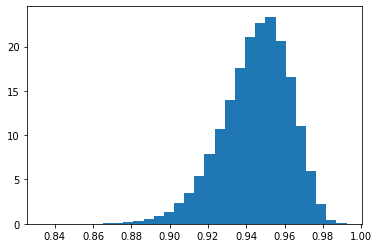

In [35]:
plt.hist(samples, density=True, bins=30)
plt.show()

## Method 2

In [67]:
coef_control = 1000 * cases_control/size_control
coef_treatment = 1000 * cases_treatment/size_treatment
coef_control, coef_treatment
1 - coef_treatment/coef_control

0.9507950795079508

In [68]:
coef_treatment , coef_control

(3.6003600360036003, 73.17073170731707)

In [69]:
a = 0.700102 + coef_control - coef_treatment 
b = 1 + coef_treatment
a/(a+b)

0.9385560463506097

In [70]:
samples = stats.beta.rvs(a, b, size=100000)
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.05, roundto=4)
hpd_mu

[(0.8838, 0.9862)]

## Method 3

In [79]:
a = 0.700102 + cases_control
b = 1 + size_control
samples_control = stats.beta.rvs(a, b, size=100000)
a = 0.700102 + cases_treatment
b = 1 + size_treatment
samples_treatment = stats.beta.rvs(a, b, size=100000)

In [80]:
samples = 1 - samples_treatment/samples_control
hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(samples, alpha=0.06, roundto=4)
hpd_mu

[(0.9054, 0.9776)]

In [81]:
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.8973800956665212, 0.9746006422005179)

In [11]:
np.percentile(samples, 2.5), np.percentile(samples, 97.5)

(0.9056403598673711, 0.9743023113489846)

In [49]:
stats.bayes_mvs(samples, alpha=0.95)

(Mean(statistic=0.9452406640957275, minmax=(0.9448928333783991, 0.9455884948130558)),
 Variance(statistic=0.0003149486004260627, minmax=(0.0003062188310299815, 0.0003236783698221439)),
 Std_dev(statistic=0.017746791271271063, minmax=(0.017500837812343163, 0.017992744730198962)))

In [61]:
import pymc3
pymc3.stats.hpd(samples, hdi_prob=.95)

array([0.90966664, 0.97707911])

In [17]:
np.percentile(samples_B, 2.5)

0.999279158674047

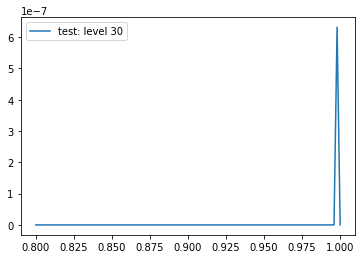

In [7]:
x = np.linspace(0.8, 1, 100)
y1 = beta.pdf(x, alpha_A, beta_A)
y2 = beta.pdf(x, alpha_B, beta_B)
#plt.plot(x, y1, label = "control: level 40")
plt.plot(x, y2, label = "test: level 30")
plt.legend()
plt.show()

In [63]:
import scipy.special as sc
import numpy as np

def probability_B_beats_A(alpha_A, beta_A, alpha_B, beta_B):
    total = 0.
    for i in range(alpha_B):
        total += np.exp(sc.betaln(alpha_A+i, beta_B+beta_A) - 
                        np.log(beta_B+i) - sc.betaln(1+i, beta_B) - sc.betaln(alpha_A, beta_A))
    return total

In [64]:
probability_B_beats_A(148, 1598 - 148, 148, 1516 - 148)

0.6829961198042657